In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator, DateFormatter
import numpy as np

In [13]:
# Load data into a DataFrame from a CSV file
df = pd.read_csv('main_data.csv')
# Check for any missing values in the dataset
df['gdp_growth'].fillna(0, inplace=True)
print(df.isnull().sum())

date             0
vcb_close        0
vnindex_close    0
exchange_rate    0
interest_rate    0
gdp              0
inflation        0
sp500_close      0
gdp_growth       0
dtype: int64


In [14]:
# Display information about the DataFrame to understand its columns and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 874 entries, 0 to 873
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           874 non-null    object 
 1   vcb_close      874 non-null    float64
 2   vnindex_close  874 non-null    float64
 3   exchange_rate  874 non-null    float64
 4   interest_rate  874 non-null    float64
 5   gdp            874 non-null    float64
 6   inflation      874 non-null    float64
 7   sp500_close    874 non-null    float64
 8   gdp_growth     874 non-null    float64
dtypes: float64(8), object(1)
memory usage: 61.6+ KB


In [15]:
# Drop unnecessary columns ('date' and 'gdp') for statistical analysis
macro_stats = df
macro_stats = macro_stats.drop(columns=['date', 'gdp'])

# Display summary statistics (mean, median, min, max, standard deviation) in a formatted table
macro_stats_table = macro_stats.agg(['mean', 'median', 'min', 'max', 'std']).style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]},
    {'selector': 'td', 'props': [('border', '1px solid #cccccc')]}
])

# Show the formatted statistics table
macro_stats_table


,vcb_close,vnindex_close,exchange_rate,interest_rate,inflation,sp500_close,gdp_growth
mean,75951.736842,1138.779279,23271.917597,1.851430,0.155400,3892.975469,0.000499
median,76103.000000,1116.495000,23198.000000,1.100000,0.150000,3963.725000,0.000000
min,43925.000000,659.210000,23057.000000,0.100000,-1.540000,2237.400000,-0.409113
max,105000.000000,1528.570000,23800.000000,8.440000,1.520000,4793.540000,0.331221
std,10462.496941,214.658961,193.968048,1.864226,0.486763,511.989497,0.022525


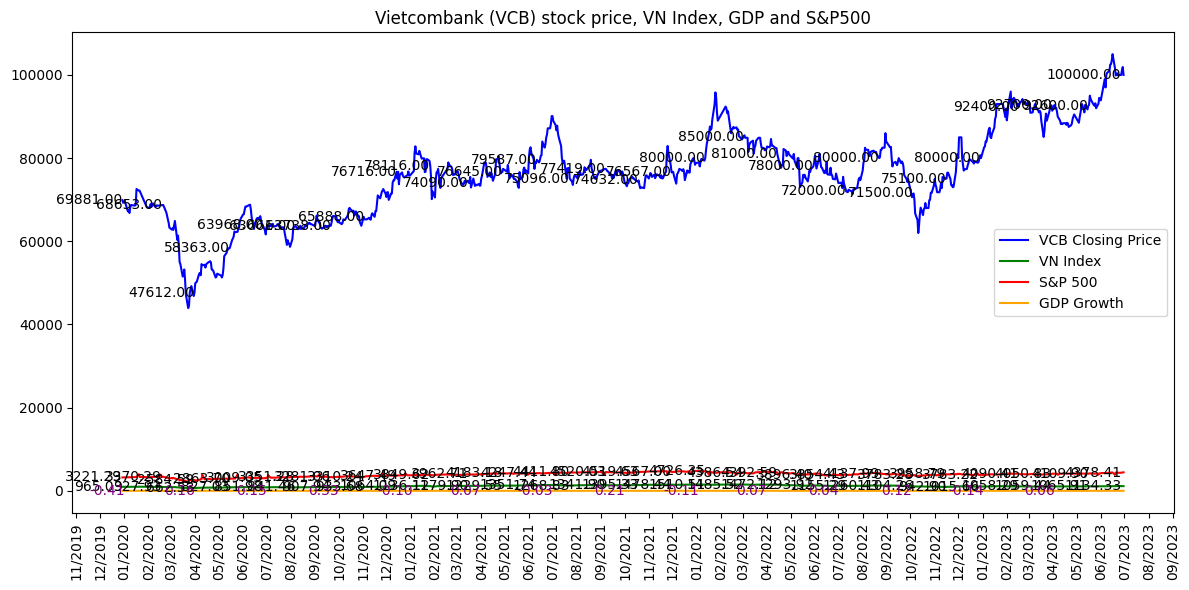

In [16]:
# Convert column date to type datetime
df['date'] = pd.to_datetime(df['date'])

plt.figure(figsize=(12, 6))

# Plotting the time series data for VCB Closing Price, VN Index, S&P 500, and GDP Growth
# Plot VCB Close
vcb, = plt.plot(df['date'], df['vcb_close'], color='blue', label='VCB Closing Price')

# Plot VN Index
vnindex, = plt.plot(df['date'], df['vnindex_close'], color='green', label='VN Index')

# Plot S&P 500
sp500, = plt.plot(df['date'], df['sp500_close'], color='red', label='S&P 500')

# Plot GDP growth
gdp_growth, = plt.plot(df['date'], df['gdp_growth'], color='orange', label='GDP Growth')

plt.title('Vietcombank (VCB) stock price, VN Index, GDP and S&P500')

plt.gca().xaxis.set_major_locator(MonthLocator())
date_format = DateFormatter('%m/%Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.xticks(rotation=90)
plt.tight_layout()

lines = [vcb, vnindex, sp500] 

# Annotate data points on the lines and annotate GDP Growth with a different color for non-zero values
for line in lines:
    x = line.get_xdata()
    y = line.get_ydata()
    for i, (x_val, y_val) in enumerate(zip(x, y)):
        if i % 30 == 0:  # Adjust interval for displaying values
            plt.text(x_val, y_val, f'{y_val:.2f}', ha='right', va='center')

x = gdp_growth.get_xdata()
y = gdp_growth.get_ydata()
for i, (x_val, y_val) in enumerate(zip(x, y)):
    if y_val != 0:  # Adjust interval for displaying values
        plt.text(x_val, y_val, f'{y_val:.2f}', ha='right', va='center', color='purple')

plt.legend(loc='center right')  # Add legend for all plotted data
# Plot the main financial metrics over time
plt.show()


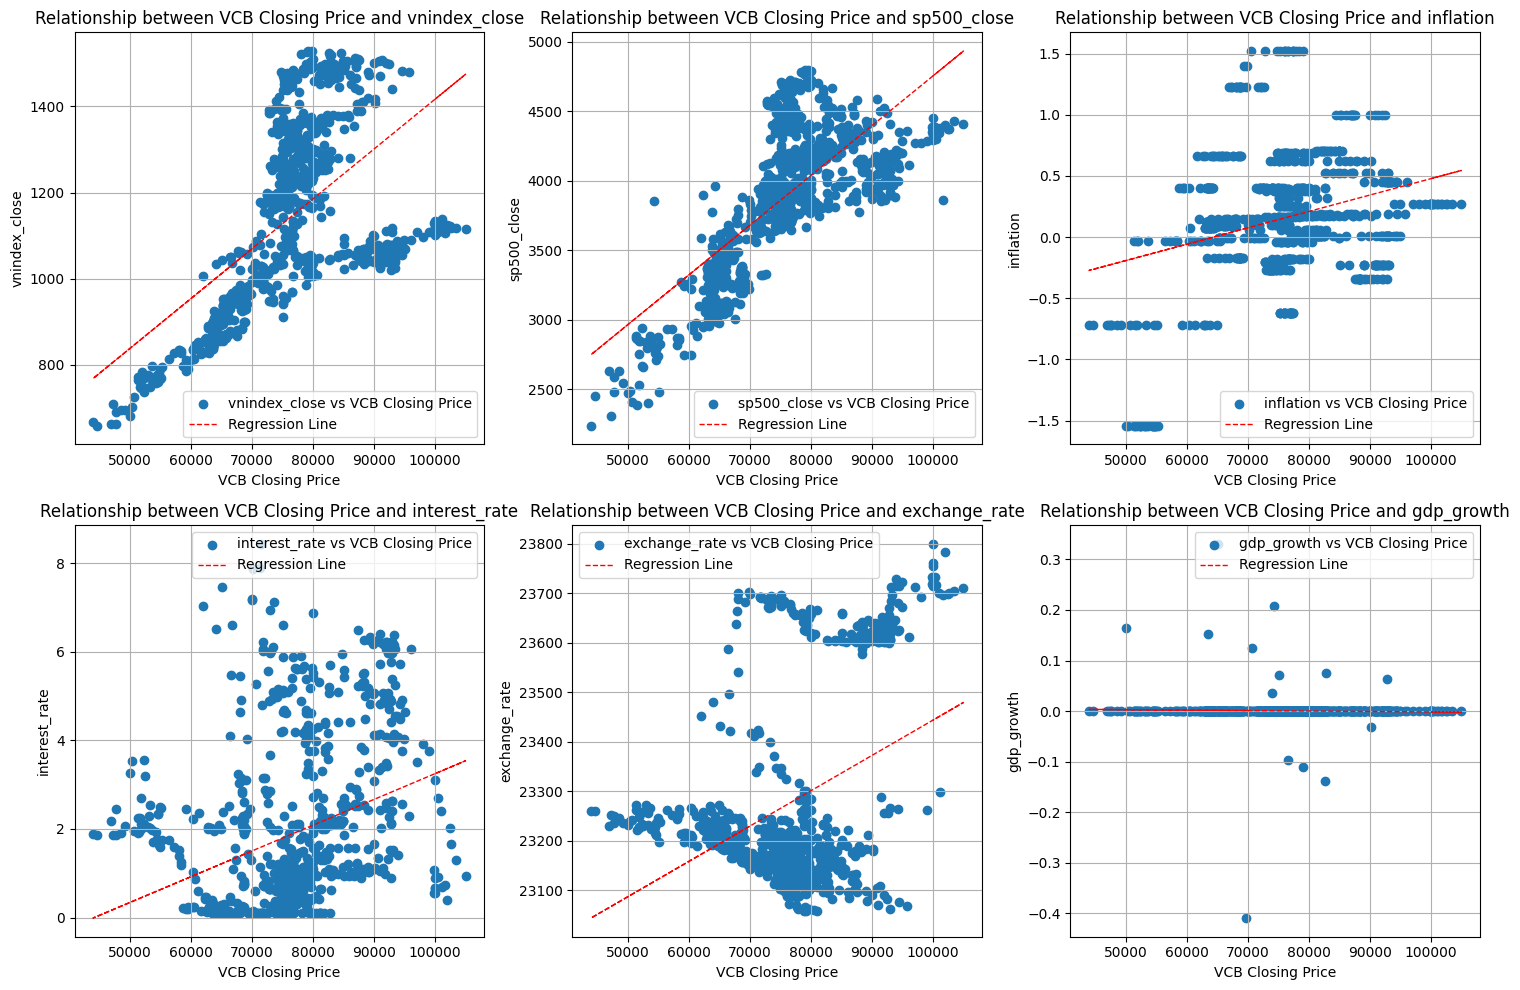

In [17]:
# Plot scatterplots to illustrate relationships between VCB Closing Price and other variables, with regression lines
variables_to_plot = ['vnindex_close', 'sp500_close', 'inflation', 'interest_rate', 'exchange_rate', 'gdp_growth']

plt.figure(figsize=(15, 10))

num_plots = len(variables_to_plot)
rows = 2
cols = 3

for i, variable in enumerate(variables_to_plot):
    plt.subplot(rows, cols, i + 1)
    plt.scatter(df['vcb_close'], df[variable], label=f'{variable} vs VCB Closing Price')
    
    # Fit a linear regression line
    m, b = np.polyfit(df['vcb_close'], df[variable], 1)
    plt.plot(df['vcb_close'], m * df['vcb_close'] + b, color='red', linestyle='--', linewidth=1, label='Regression Line')
    
    plt.title(f'Relationship between VCB Closing Price and {variable}')
    plt.xlabel('VCB Closing Price')
    plt.ylabel(variable)
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


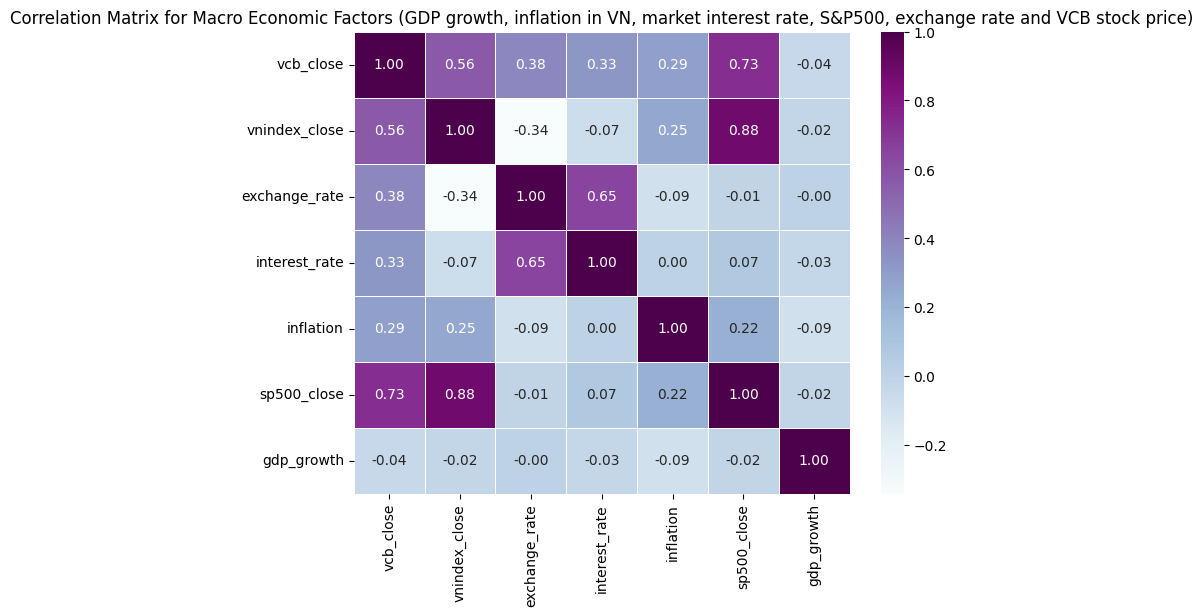

In [18]:
# Calculate the correlation matrix
correlation_matrix = macro_stats.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix for Macro Economic Factors (GDP growth, inflation in VN, market interest rate, S&P500, exchange rate and VCB stock price)')
plt.show()

In [19]:
# Calculate the covariance matrix
covariance_matrix = macro_stats.cov()

# Display the covariance matrix in table format
cov_matrix_table = covariance_matrix.style.set_table_styles([
    {'selector': 'th', 'props': [('background-color', '#f2f2f2'), ('color', 'black')]},
    {'selector': 'td', 'props': [('border', '1px solid #cccccc')]}
])

# Show the covariance matrix as a table
cov_matrix_table


,vcb_close,vnindex_close,exchange_rate,interest_rate,inflation,sp500_close,gdp_growth
vcb_close,109463842.233074,1265761.804243,780311.194659,6358.364821,1464.363450,3915278.584728,-9.803316
vnindex_close,1265761.804243,46078.469552,-14206.510705,-28.683236,26.286559,97036.448916,-0.108382
exchange_rate,780311.194659,-14206.510705,37623.603630,236.485339,-8.758299,-972.907388,-0.002676
interest_rate,6358.364821,-28.683236,236.485339,3.475339,0.001931,66.347393,-0.001181
inflation,1464.363450,26.286559,-8.758299,0.001931,0.236938,54.076314,-0.000996
sp500_close,3915278.584728,97036.448916,-972.907388,66.347393,54.076314,262133.245001,-0.237186
gdp_growth,-9.803316,-0.108382,-0.002676,-0.001181,-0.000996,-0.237186,0.000507
